In [1]:
import scipy.stats as st
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DataSetMarketing.csv", index_col=0)

### EDA

In [4]:
df.head ()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [5]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 547
Data columns (total 7 columns):
MarketID            548 non-null int64
MarketSize          548 non-null object
LocationID          548 non-null int64
AgeOfStore          548 non-null int64
Promotion           548 non-null int64
week                548 non-null int64
SalesInThousands    548 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 34.2+ KB


In [7]:
df.groupby("Promotion").count()

,MarketID,MarketSize,LocationID,AgeOfStore,week,SalesInThousands
Promotion,,,,,,
1,172,172,172,172,172,172
2,188,188,188,188,188,188
3,188,188,188,188,188,188


In [ ]:
#La promoción 2 y 3 llegaron a generar los mismos Call to actions en ventas. promo 1 hizo menos. 
#¿Cuál generó más ganancias?

In [8]:
df.groupby("Promotion").sum()

,MarketID,LocationID,AgeOfStore,week,SalesInThousands
Promotion,,,,,
1,996,84016,1424,430,9993.03
2,1108,93520,1500,470,8897.93
3,1028,85316,1736,470,10408.52


In [ ]:
#La promoción 3 generó más ganancias (para la muestra, pero no necesariamente para la población).

In [9]:
df.groupby("Promotion").mean()

,MarketID,LocationID,AgeOfStore,week,SalesInThousands
Promotion,,,,,
1,5.790698,488.465116,8.279070,2.5,58.099012
2,5.893617,497.446809,7.978723,2.5,47.329415
3,5.468085,453.808511,9.234043,2.5,55.364468


In [ ]:
#Yet, promotion 1 has the greatest mean (¿Será la mejor? Lo verificaremos con las pruebas de hipótesis)

### 5 Gráficas interpretadas

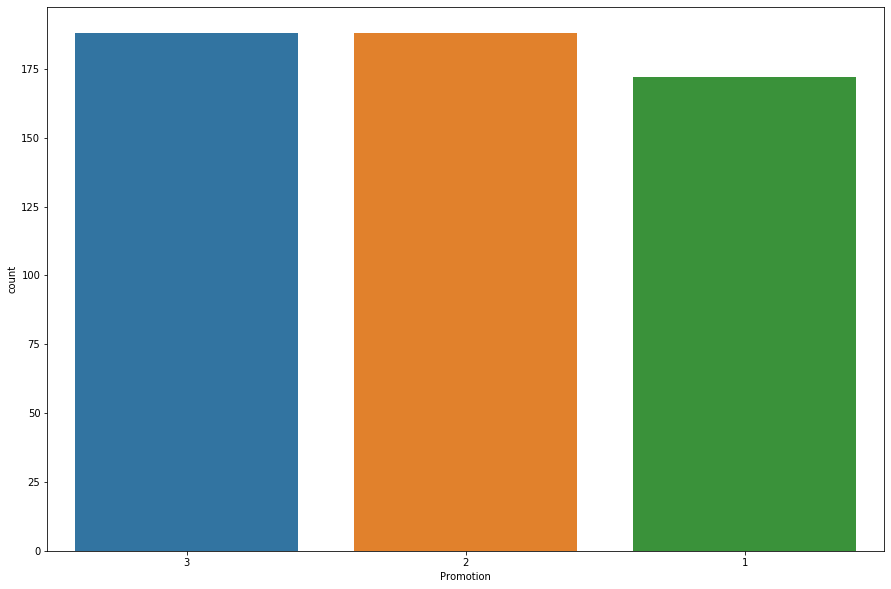

In [93]:
#Muestra el número de promociones que se registraron en la DB
plt.figure(figsize=(15,10))
sns.countplot(x=df['Promotion'], order= df['Promotion'].value_counts().index)
plt.show()

Esto nos indica que la cant. de veces utilizada por promoción es similar. 


In [11]:
sale_sum = df.groupby("week").sum()

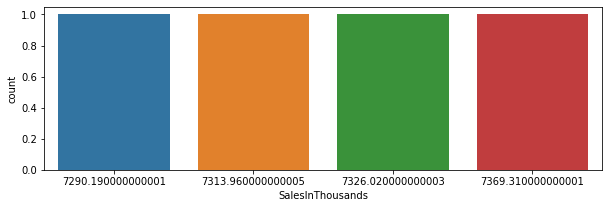

In [19]:
plt.figure(figsize=(10,3))
sns.countplot(x=sale_sum['SalesInThousands'])
plt.show()

Esta grafica indica que el mayor numero de ventas se realizo en la semana 4, sin embargo el numero de ventas es muy similar al resto de las semanas. 

In [21]:
#Agrupa la suma de las ventas por semana y promoción
df_grp = df.groupby(['Promotion', 'week'])['SalesInThousands'].sum().reset_index()
df_grp.head()

,Promotion,week,SalesInThousands
0,1,1,2504.51
1,1,2,2447.97
2,1,3,2527.32
3,1,4,2513.23
4,2,1,2243.32


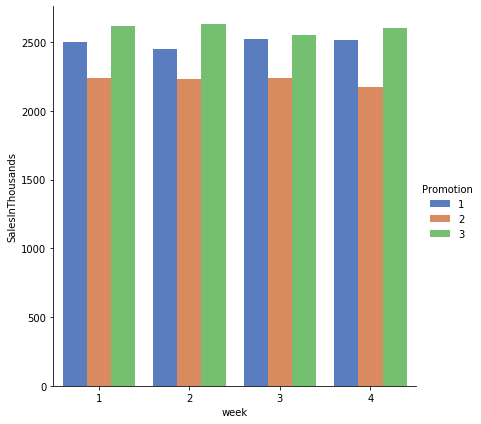

In [22]:
g = sns.catplot(x="week", y="SalesInThousands", hue="Promotion", data=df_grp,height=6, kind="bar", palette="muted")

Esta grafica nos indica que en todas las semanas hubo mayor venta de la promocion 3 y menor venta de la promocion 2.

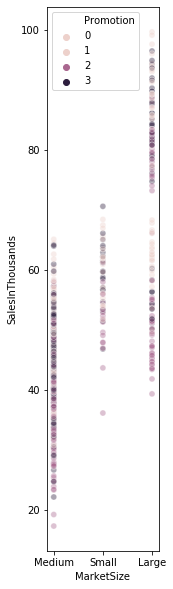

In [25]:
# Graficar las ventas por tamaño de mercado y tipo de promoción 
plt.figure(figsize=(2,10))
sns.scatterplot(x=df["MarketSize"],y=df["SalesInThousands"],hue=df["Promotion"], alpha=0.4)
plt.show()

Se observa que los mercados pequeños tienen una dispersión muy corta, mientras que la largas y medianas no tanto.

In [60]:
# Crear un nuevo DF agrupando las ventas en suma por edad de tienda y promocion 
df_grp1 = df.groupby(['Promotion', 'AgeOfStore'])['SalesInThousands'].sum().reset_index()

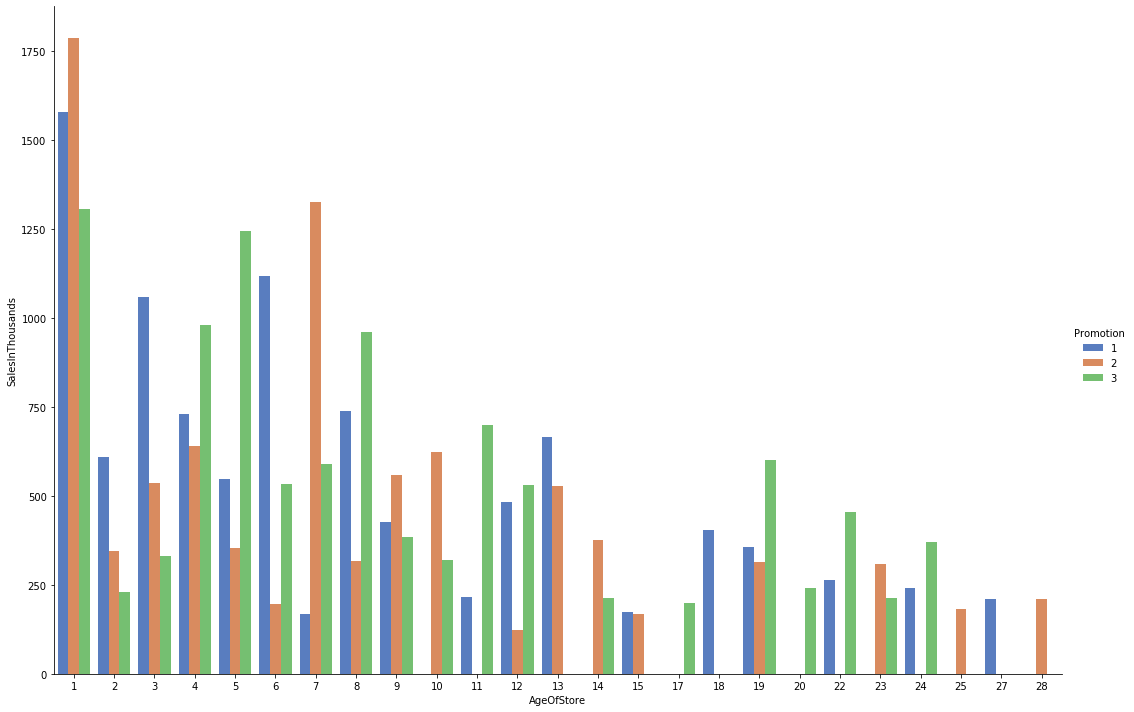

In [92]:
g1 = sns.catplot(x="AgeOfStore", y="SalesInThousands", hue="Promotion", data=df_grp1,height=10, aspect=1.5, kind="bar", palette="muted")
plt.show ()


Gráfica que indica que existe una correlación negativa entre el número de ventas y la antigüedad del negocio.

In [26]:
t, p = st.ttest_ind(df.loc[df['Promotion'] == 1,'SalesInThousands',].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
                       equal_var=True)
print (("El valor de t es igual a:{}").format(t)) 
print (("El valor de p es igual a:{}").format(p)) 

El valor de t es igual a:6.453671702181005
El valor de p es igual a:3.5506696512134566e-10


In [30]:
t, p = st.ttest_ind(df.loc[df['Promotion'] == 1,'SalesInThousands',].values,
                       df.loc[df['Promotion'] == 3, 'SalesInThousands'].values,
                       equal_var=True)
print (("El valor de t es igual a:{}").format(t)) 
print (("El valor de p es igual a:{}").format(p))

El valor de t es igual a:1.5551383687293547
El valor de p es igual a:0.12079667272313273


In [28]:
t, p = st.ttest_ind(df.loc[df['Promotion'] == 2,'SalesInThousands',].values,
                       df.loc[df['Promotion'] == 3, 'SalesInThousands'].values,
                       equal_var=True)

print (("El valor de t es igual a:{}").format(t)) 
print (("El valor de p es igual a:{}").format(p)) 

El valor de t es igual a:-4.88139271089348
El valor de p es igual a:1.562894303627738e-06


In [ ]:
#Conlusión: #Dado que p es positiva se puede sospechar que la media de la poblacion de A (promoción 1) es mayor de B (promoción 2).

### ¿Cuál fue la mejor promo?

In [3]:
#La Promo 3.

In [4]:
import numpy as np

In [6]:
df_1= df[df["Promotion"]==1]
df_2= df[df["Promotion"]==2]
df_3= df[df["Promotion"]==3]

#Saca una muestra aleatoria de cada df por promoción
sampleMeans_1 = []
for m in range(1000):
    samples = df_1["SalesInThousands"].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans_1.append(sampleMean)
sampleMeans_2 = []
for m in range(1000):
    samples = df_2["SalesInThousands"].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans_2.append(sampleMean)
sampleMeans_3 = []
for m in range(1000):
    samples = df_3["SalesInThousands"].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans_3.append(sampleMean)

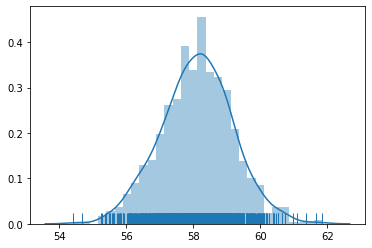

In [7]:
#Promocion 1
sns.distplot([sampleMeans_1], bins=30, kde=True, rug=True)
plt.show()

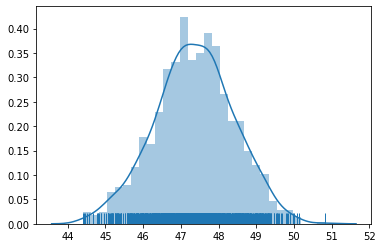

In [8]:
#Promocion 2
sns.distplot([sampleMeans_2], bins=30, kde=True, rug=True)
plt.show()

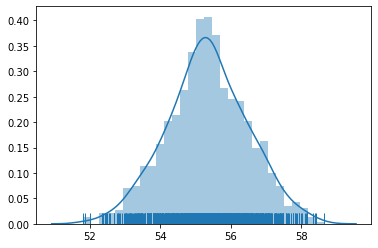

In [9]:
#Promocion 3
sns.distplot([sampleMeans_3], bins=30, kde=True, rug=True)
plt.show()

In [ ]:
#Comprueban que muestras aleatorias siguen la forma de una distribución normal (de la población original).

### ¿Te atreverías a presentar este reporte a tu jefe?

No realmente. Aún no me siento seguro de saber interpretar correctamente los datos. 
Sacarlos es poco más que sencillo; lo complicado es deducir conclusiones de los datos y para
eso requiero tener mucho insight sobre lo que se está haciendo. Aún tengo cosas que no llego a entender
con claridad, para lo cual debo seguir estudiando y practicar más. 